In [2]:
import os
from google.cloud import storage
import pandas as pd
from io import BytesIO
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=r"C:\Users\theda\fraud-detection-vertex-ai\fiery-aspect-449612-f9-738f04da3538.json"
bucket_name='fraud-model-bucket-v1'
file_path="creditcard.csv"

client=storage.Client()
bucket=client.bucket(bucket_name)
blob=bucket.blob(file_path)
data=blob.download_as_bytes()

df=pd.read_csv(BytesIO(data))

In [12]:
df.info()
df.describe()
df.isnull().sum()
df["Class"].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

IndexError: index 30 is out of bounds for axis 0 with size 30

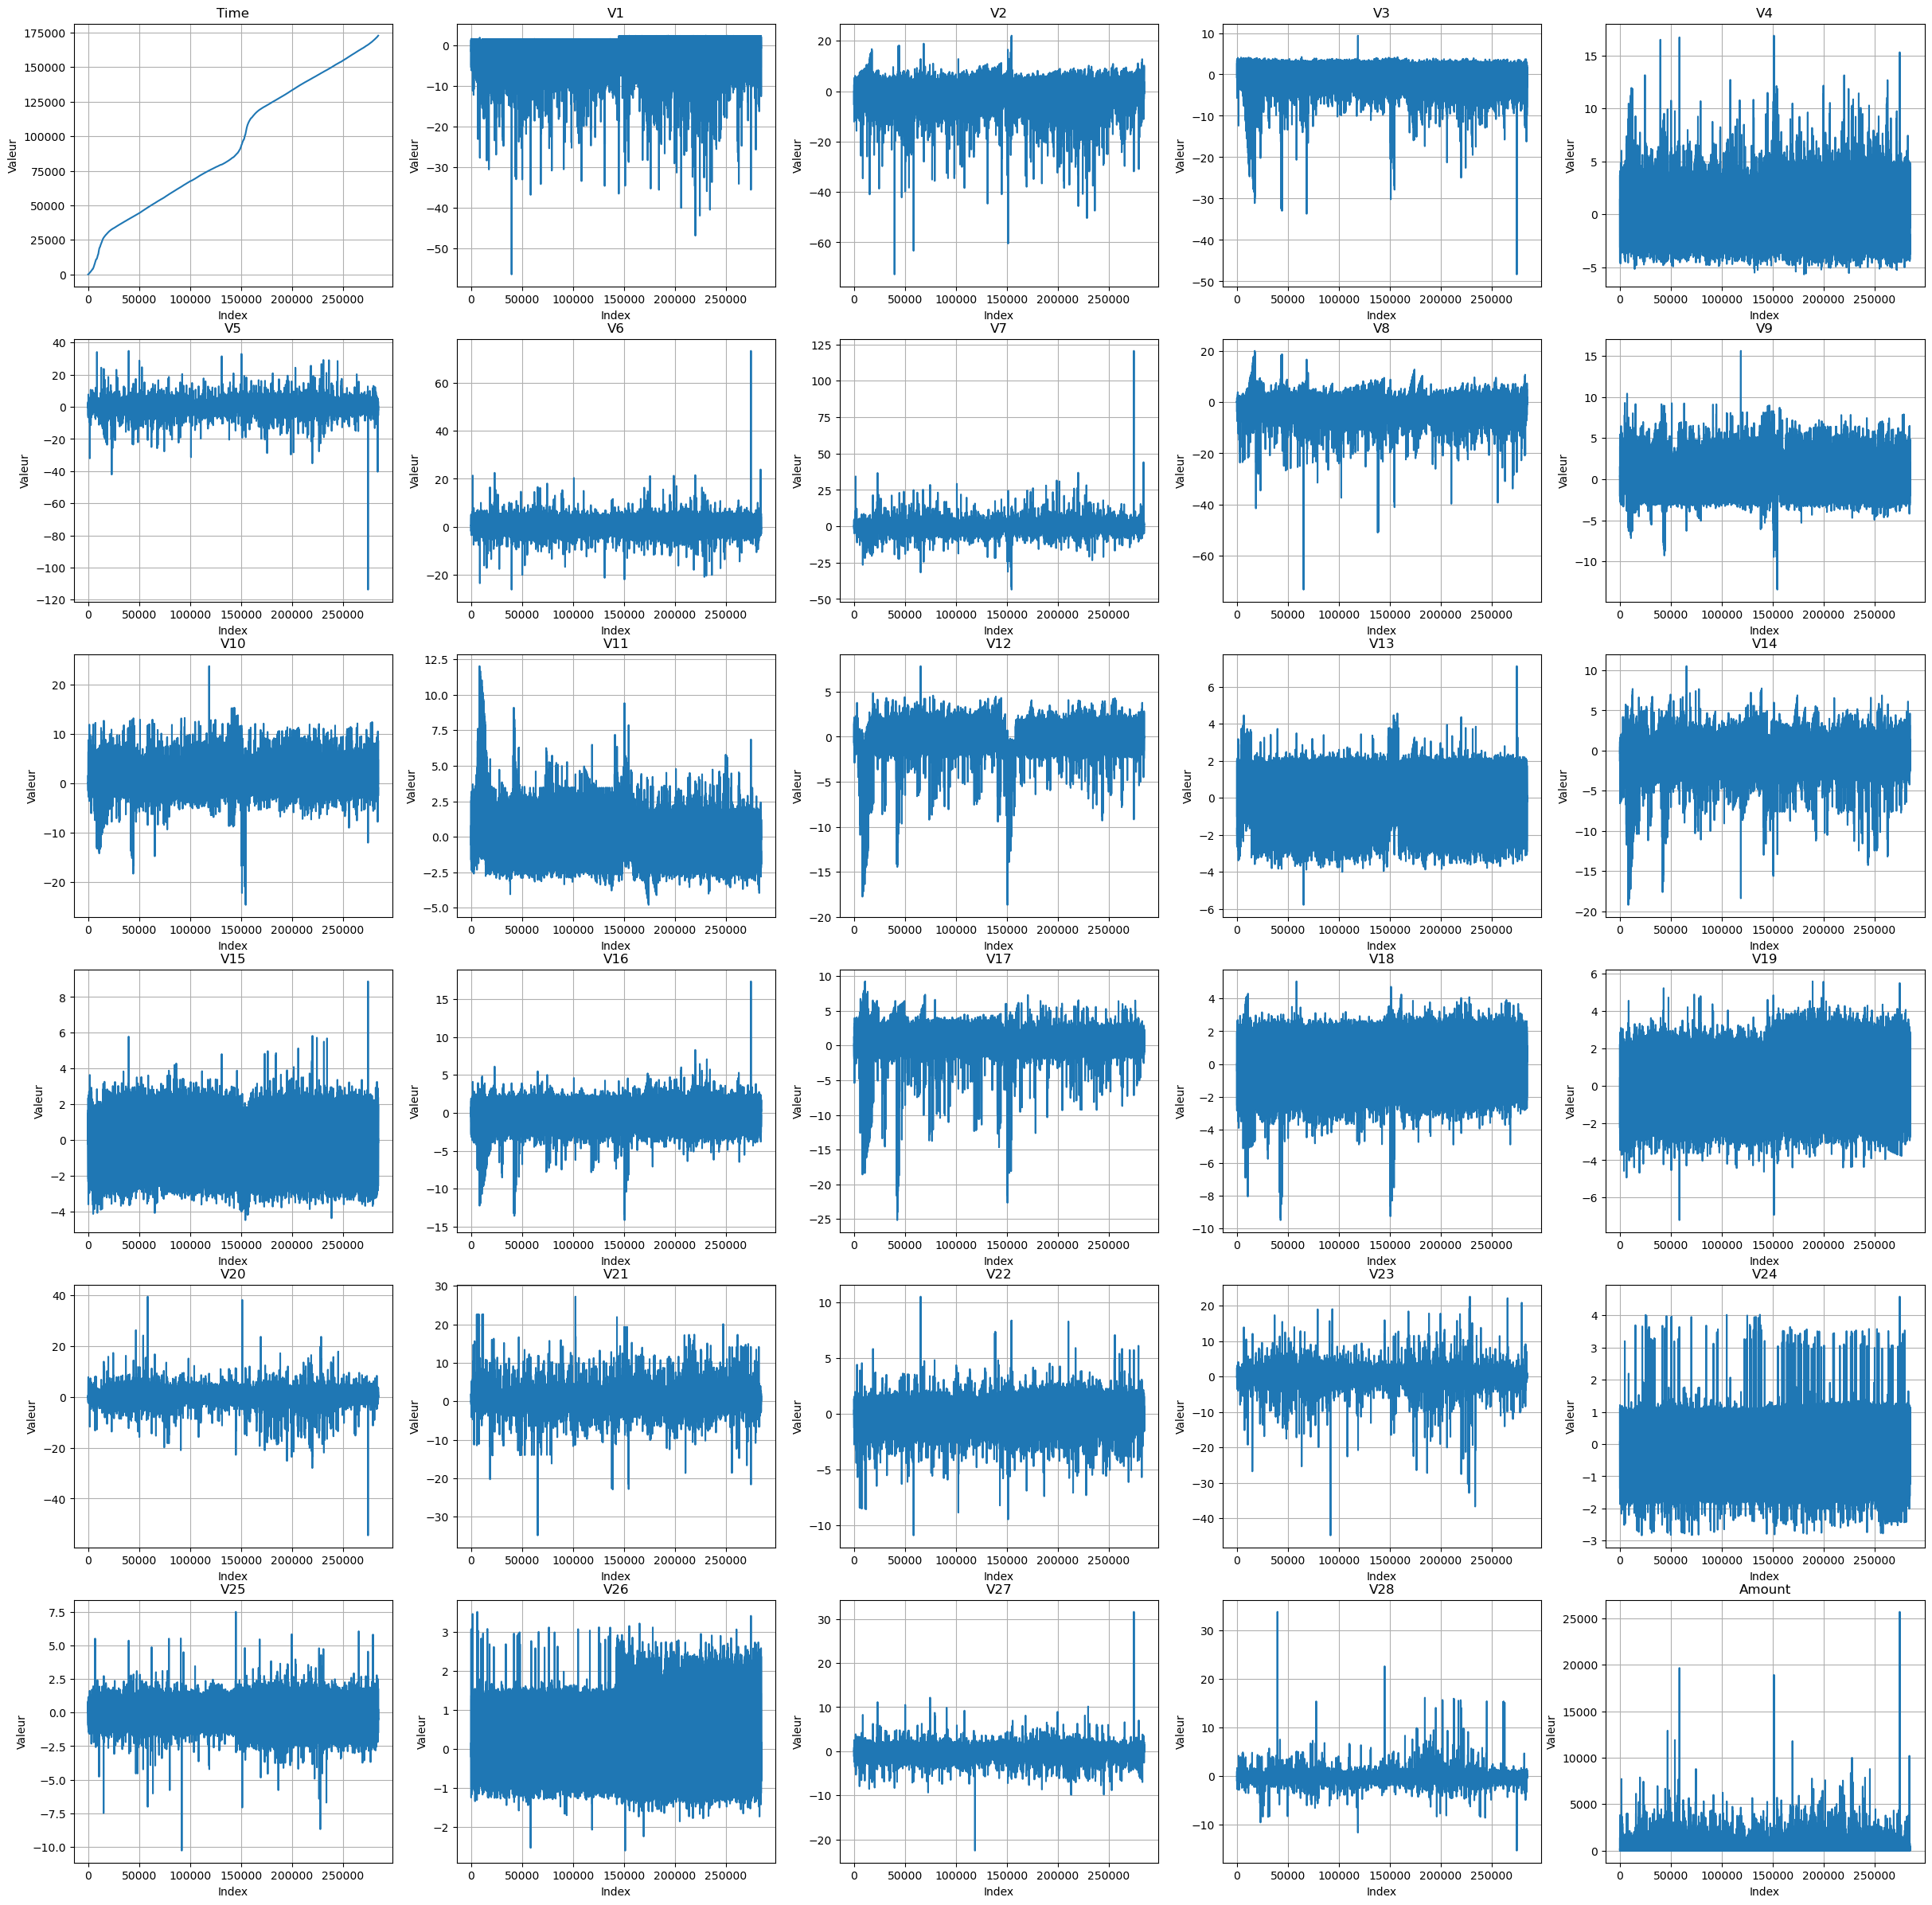

In [10]:
list_var=df.columns.to_list()
cols_to_drop=['class']
list_var=list_var=[elt for elt in list_var if elt not in cols_to_drop]


fig,axes=plt.subplots(nrows=6,ncols=5,figsize=(30,30))
axes=axes.flatten()

for i,col in enumerate(list_var):
    axes[i].plot(df.index,df[col])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Valeur')
    axes[i].grid()

plt.tight_layout()
plt.show()


In [15]:
df.to_csv("../data/processed/cleaned_creditcard.csv", index=False)
